# 07MAIR - Redes Neuronales y Deep Learning
## VC04_V05: Deep Learning y Deep vision

In [15]:
# Funciones base

import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [16]:
# Cargar dataset de mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Acondicionando el conjunto de datos**

In [17]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

# Normalización de los datos
x_train_norm, x_test_norm = x_train / 255, x_test / 255

# Partición de los datos
x_train_tr, x_train_val, y_train_tr, y_train_val = train_test_split(
    x_train_norm, y_train, test_size=0.15, random_state=42)

# Adecuar dimensión para su procesamiento en formato tensor imagen
x_tr = np.expand_dims(x_train_tr, axis=-1)
x_val = np.expand_dims(x_train_val, axis=-1)
x_test = np.expand_dims(x_test_norm, axis=-1)

print(x_tr.shape)
print(x_val.shape)
print(x_test.shape)

(51000, 28, 28, 1)
(9000, 28, 28, 1)
(10000, 28, 28, 1)


#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [18]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
## BM Bloque 1
convnet.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(x_tr.shape[1], x_tr.shape[2], 1)))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 2
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 3
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 64)         0

In [19]:
from tensorflow.keras.optimizers import Adam

# Losses para multi-clax softmax (Particular de Keras y Tensorflow)
# Sparse -> 5 -> sparse_categorical_crossentropy
# OHE -> [0, 0, 0, 0, 1, 0, ...] -> categorical_crossentropy

# Compilación
lr = 0.001
convnet.compile(optimizer=Adam(learning_rate=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
# Entrenamiento
print("[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_tr, y_train_tr,
                epochs=5, batch_size=16,
                validation_data=(x_val, y_train_val))

[INFO] Entrenando Red Neuronal...
Epoch 1/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.1353 - accuracy: 0.9571 - val_loss: 0.0673 - val_accuracy: 0.9799
Epoch 2/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0412 - val_accuracy: 0.9876
Epoch 3/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0561 - val_accuracy: 0.9838
Epoch 4/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0365 - val_accuracy: 0.9907
Epoch 5/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0401 - val_accuracy: 0.9896


#### **- Observando el proceso de entrenamiento para tomar decisiones**

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



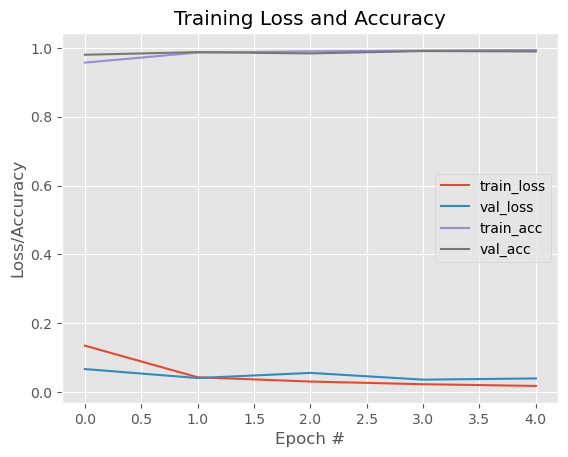

In [21]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H=H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 64)        

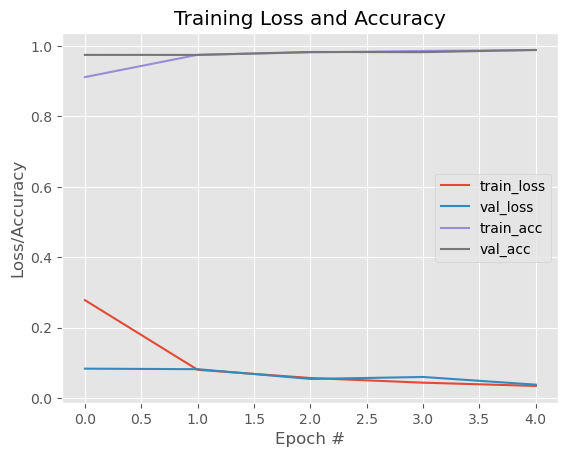

In [22]:
# Red Neuronal con menos parámetros (global_average_pooling)

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
## BM Bloque 1
convnet.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(x_tr.shape[1], x_tr.shape[2], 1)))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 2
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 3
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

# TOP MODEL
convnet.add(layers.GlobalAvgPool2D())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

convnet.summary()

# Compilación
lr = 0.001
convnet.compile(optimizer=Adam(learning_rate=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento
print("[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_tr, y_train_tr,
                epochs=5, batch_size=16,
                validation_data=(x_val, y_train_val))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_test, y_test)

## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

In [23]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

labelNames = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro',
              'Rana', 'Caballo', 'Barco', 'Camión']

print("[INFO] Loading CIFAR10 data...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

# Normalización en intensidad de las imágenes
x_tr_norm, x_te_norm = x_train.astype("float32") / 255, x_test.astype("float32") / 255

# Partición de los datos: train/val/test
x_train_tr, x_train_val, y_train_tr, y_train_val = train_test_split(
    x_tr_norm, y_train, test_size=0.15, random_state=42
)

# Dimensiones
print(x_train_tr.shape)
print(y_train_tr.shape)
print(x_train_val.shape)
print(y_train_val.shape)
print(x_te_norm.shape)
print(y_test.shape)

[INFO] Loading CIFAR10 data...
(42500, 32, 32, 3)
(42500, 1)
(7500, 32, 32, 3)
(7500, 1)
(10000, 32, 32, 3)
(10000, 1)


#### **- Inspeccionando el conjunto de datos**

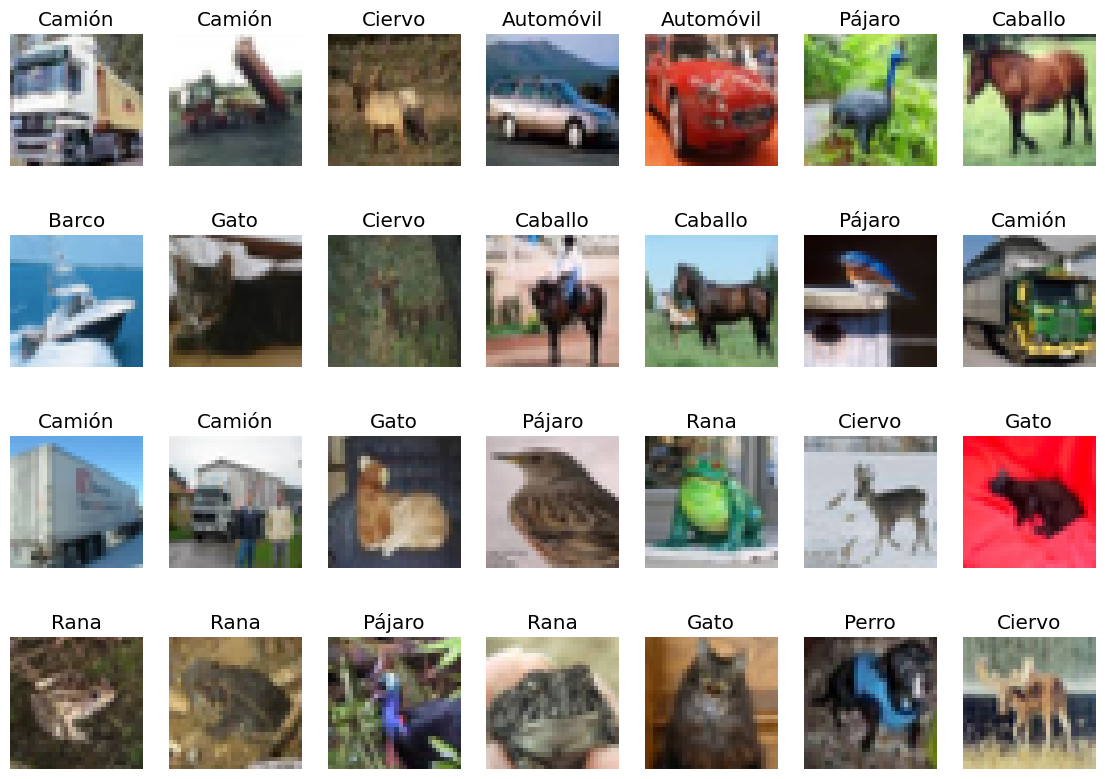

In [24]:
# Inspección del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis('off')


#### **- Creando la topología de red neuronal y entrenándola: MLP**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Arquitectura de red - modo API Sequential
mlp = Sequential()
mlp.add(Flatten(input_shape=(32, 32, 3)))
mlp.add(Dense(1024, activation='relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(512, activation='relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(10, activation='softmax'))

# Compilamos el modelo y entrenamos
mlp.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
mlp.summary()

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = mlp.fit(x_train_tr, y_train_tr, epochs=100, batch_size=128,
            validation_data=(x_train_val, y_train_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
No

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.61      0.50      0.55      1000
           1       0.64      0.57      0.60      1000
           2       0.38      0.29      0.33      1000
           3       0.31      0.41      0.35      1000
           4       0.34      0.56      0.43      1000
           5       0.46      0.33      0.38      1000
           6       0.54      0.50      0.52      1000
           7       0.51      0.57      0.54      1000
           8       0.69      0.56      0.62      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.49     10000
weighted avg       0.50      0.48      0.49     10000



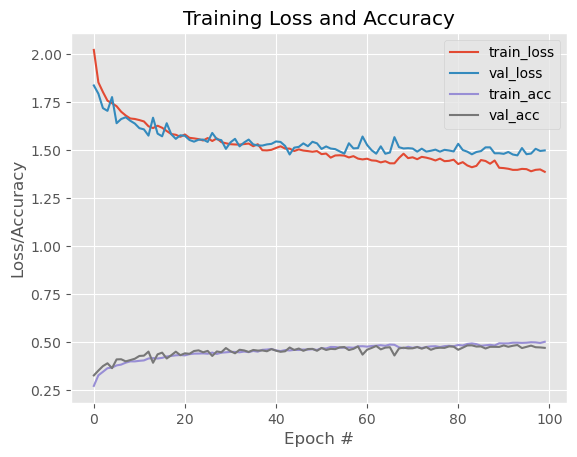

In [26]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(mlp, x_te_norm, y_test)

#### **- Creando la topología de red neuronal y entrenándola: CNN**

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0   

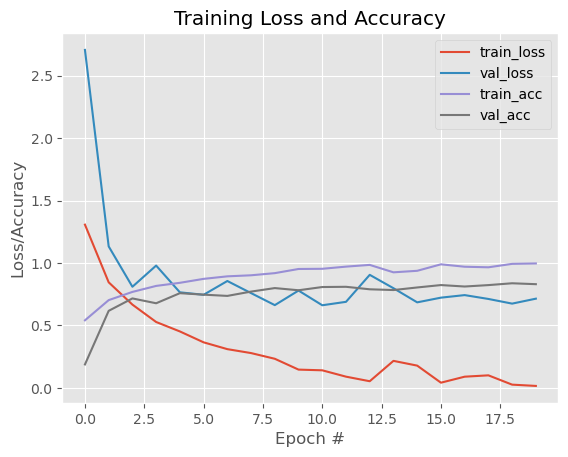

In [27]:
# Arquitectura de red - modo API Functional
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Definimos layer de entrada
input = layers.Input(shape=(x_train_tr.shape[1], x_train_tr.shape[2], x_train_tr.shape[3]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

# Bloque 4
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x2)
x4 = layers.BatchNormalization()(x4)
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x4)
x4 = layers.BatchNormalization()(x4)
x4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x4)
gap = layers.Dropout(0.25)(gap)
predictions = layers.Dense(10, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

# Compilamos el modelo y entrenamos
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_train_tr, y_train_tr, batch_size=128, epochs=20,
                validation_data=(x_train_val, y_train_val))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te_norm, y_test)

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [28]:
# Binarizar etiquetas - por si es necesario convertir a one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_tr_ohe = lb.fit_transform(y_train_tr)
y_train_val_ohe = lb.fit_transform(y_train_val)
y_test_ohe = lb.fit_transform(y_test)

# Dimensiones
print(y_train_tr_ohe.shape)
print(y_train_val_ohe.shape)
print(y_test_ohe.shape)

(42500, 10)
(7500, 10)
(10000, 10)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [29]:
# Crear Image DataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

#### **- Inspeccionando las muestras generadas sintéticamente**

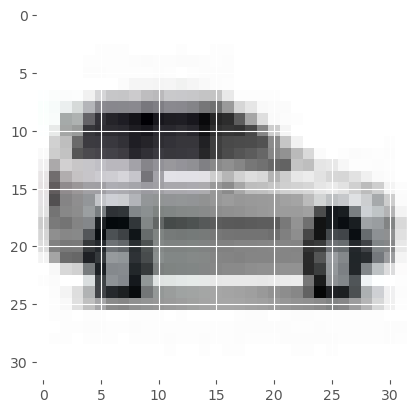

Label = Automóvil


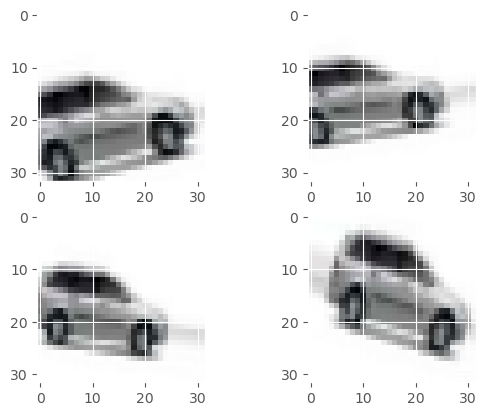

In [30]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

sample = 15
plt.imshow(image.array_to_img(x_train_tr[sample]))
plt.show()
print('Label = {}'.format(labelNames[y_train_tr_ohe[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_train_tr[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_33 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0   

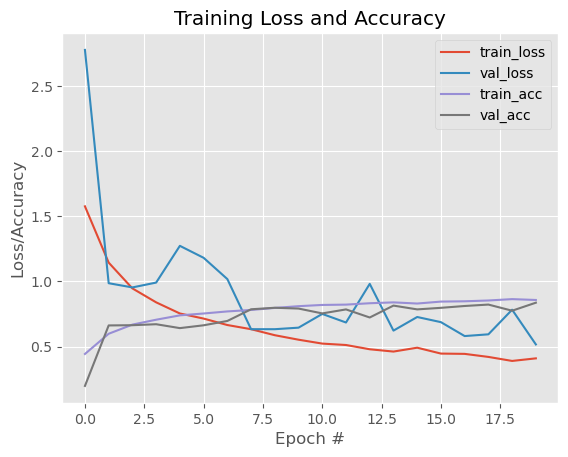

In [32]:
# Arquitectura de red - modo API Functional
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Hiperparámetros
epochs = 20
batch_size = 128

# Definimos layer de entrada
input = layers.Input(shape=(x_train_tr.shape[1], x_train_tr.shape[2], x_train_tr.shape[3]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

# Bloque 4
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x2)
x4 = layers.BatchNormalization()(x4)
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x4)
x4 = layers.BatchNormalization()(x4)
x4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x4)
gap = layers.Dropout(0.25)(gap)
predictions = layers.Dense(10, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

# Compilamos el modelo y entrenamos
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="categorical_crossentropy",       # Ahora se trabaja con OHE, por lo que cambiamos la función de pérdidas
                metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = convnet.fit(datagen.flow(x_train_tr, y_train_tr_ohe, batch_size=batch_size),
                epochs=epochs, steps_per_epoch=x_train_tr.shape[0] // batch_size,
                validation_data=(x_train_val, y_train_val_ohe))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te_norm, y_test)

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [ ]:
# Imports necesarios

# Importando y normalizando el set de datos CIFAR10

# One-hot encoding

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!


#### **- Cargando la topología de CNN (base model)**

In [ ]:
# keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

# Cargar arquitectura y pesos


#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [ ]:
# Conectar el modelo con el top model


#### **- Entrenando la solución**

In [ ]:
# Import the necessary packages

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

In [ ]:
# Imports que vamos a necesitar

# Cargamos el dataset CIFAR10

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases

# En caso de inestabilidades numéricas pasar datos a one-hot encoding

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos

# Mostramos la arquitectura

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

**EJERCICIO PROPUESTO:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.

## **VISUALIZANDO POR DENTRO UNA CNN**

#### **- Visualizar activaciones intermedias**

- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
%matplotlib inline

# Visualizando imagen
sample = 1000
input_img = trainX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(trainX[sample]))
plt.show()

In [ ]:
# Modificar el modelo para que nos devuelva los mapas de activación


In [ ]:
# Visualización de la salida de un filtro - activacion, 32 canales, feature map de 30x30


In [ ]:
# Visualización de las activaciones en todas las capas



### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son más difíciles de interpretar (abstractas) y tienen información relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

#### **- Visualizar filtros convolucionales**

- Visualizar las imagenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])

    # Para obtener el patron que responde de forma máxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # Seleccionar el primero, ya que esto devuelve una lista
    # Normalización para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Última constante para evitar dividir por 0
    # Definir funcion que calcula la pérdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])

    # Iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # Magnitud de cada actualizacion en el gradiente
    n_steps = 40 # Número de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # Procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')

    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block2_conv1'
filter_index = 112 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

**EJERCICIO PROPUESTO:** Mostrar los patrones de maxima activacion para todos los filtros de una capa.

#### **- Visualizar hetmaps de activación por clase**

- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# Técnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Cargar imagen de gato
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# Testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
tabby_output_index = np.argmax(prediction[0])
tabby_output = model.output[:,tabby_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabby_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# Visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

**EJERCICIO PROPUESTO:** Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.).